<a href="https://colab.research.google.com/github/kirtanag/analysis_esg/blob/main/ESGCustomerImpactipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the hypothesis that UK-based Oil companies are backing out of meaningful sustainability activities

Shell PLC's new CEO has announced in 2023 of its plans to pivot away from renewable energy sources to 'traditional' sources (AKA fossil fuels).

This project aims to analyse qualitative and quantitative data available from the three companies Shell, BP, and Harbour Energy to test this hypothesis.

The three companies will be analysed on a few specific criteria and given points based on performance

### Installing and loading Python packages

In [1]:
# Set up for running selenium in Google Colab
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,463 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,274 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,079 kB in 2s (1,723 kB/s)
Reading package li

In [5]:
!pip install -U seleniumbase
!pip install undetected_chromedriver
from IPython.display import clear_output
clear_output()

In [6]:
import undetected_chromedriver as uc
from seleniumbase import Driver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium import webdriver

## 1) Trend of sustainable buzzwords used over years in annual reports, sustainability reports, and company websites

In [4]:
df_sustainability_text = pd.DataFrame(columns=['company', 'source_type', 'source_link', 'source_text'])
df_sustainability_text

,company,source_type,source_link,source_text


### a. 'Sustainability' website landing page

#### 1] Shell

In [6]:
# Setting up the selenium driver
driver = Driver(uc=True, headless=True)
driver.get("https://www.shell.com/sustainability")
wait = WebDriverWait(driver, 10)
reject_button = wait.until(EC.element_to_be_clickable((By.ID, '_evidon-decline-button')))
# Click the "Reject optional cookies" button
reject_button.click()
# Get the page source
page_source = driver.page_source

In [7]:
# Parse the HTML content of the page
soup = BeautifulSoup(page_source, "html.parser")
# Find all the links within the specified div
div_class = "bg-bga text-txa grid lg:grid-cols-12 md:grid-cols-2 sm:grid-cols-1"
links = soup.find_all("main", class_=div_class)

# Extract and print the href attributes from the links
links_final = []
for link in links:
    anchors = link.find_all("a", href=True)
    for anchor in anchors:
        href = anchor["href"]
        links_final.append(href)
        print(href)

# Scraping all these links for text
count=0
for lnk in links_final:
  count+=1
  if count%5==0:
    print(count)
  try:
    driver.get(lnk)
    wait = WebDriverWait(driver, 1)
    page_source_data = driver.page_source
    link_text = BeautifulSoup(page_source_data, "html.parser").text
    df_sustainability_text.loc[len(df_sustainability_text)]=['Shell', 'Website', lnk, link_text]
  except:
    pass

https://reports.shell.com/sustainability-report/2022/
https://www.shell.com/sustainability/our-approach/sustainability-at-shell.html
https://www.shell.com/sustainability/our-approach/un-sustainable-development-goals.html
https://www.shell.com/sustainability/our-approach/governance.html
https://www.shell.com/sustainability/our-approach/commitments-policies-and-standards.html
https://www.shell.com/sustainability/our-approach/external-voluntary-codes.html
https://www.shell.com/sustainability/our-approach/working-in-partnership.html
https://www.shell.com/sustainability/our-approach/environmental-and-community-partners.html
https://www.shell.com/sustainability/our-approach/impact-assessment.html
https://www.shell.com/sustainability/transparency-and-sustainability-reporting/sustainability-reports.html
https://www.shell.com/sustainability/transparency-and-sustainability-reporting/performance-data.html
https://www.shell.com/sustainability/transparency-and-sustainability-reporting/performance-d

In [8]:
df_sustainability_text['source_text'] = df_sustainability_text['source_text'].apply(lambda x: x.replace('\n', ' '))
df_sustainability_text

,company,source_type,source_link,source_text
0,Shell,Website,https://reports.shell.com/sustainability-repor...,Shell Sustainability Report 2022 - Shell pl...
1,Shell,Website,https://www.shell.com/sustainability/our-appro...,What does Sustaina...
2,Shell,Website,https://www.shell.com/sustainability/our-appro...,UN Sustainable Dev...
3,Shell,Website,https://www.shell.com/sustainability/our-appro...,Sustainability Gov...
4,Shell,Website,https://www.shell.com/sustainability/our-appro...,"Commitments, polic..."
5,Shell,Website,https://www.shell.com/sustainability/our-appro...,External voluntary...
6,Shell,Website,https://www.shell.com/sustainability/our-appro...,Working with other...
7,Shell,Website,https://www.shell.com/sustainability/our-appro...,Environmental and ...
8,Shell,Website,https://www.shell.com/sustainability/our-appro...,Impact Assessments...
9,Shell,Website,https://www.shell.com/sustainability/transpare...,Sustainability Rep...


#### 2] BP

In [9]:
# Setting up the selenium driver
driver.get("https://www.bp.com/en/global/corporate/sustainability.html")
wait = WebDriverWait(driver, 10)
reject_button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "nr-cookie-reject")))
# Click the "Reject optional cookies" button
reject_button.click()
# Get the page source
page_source = driver.page_source

In [10]:
# Parse the HTML content of the page
soup = BeautifulSoup(page_source, "html.parser")

links_final = []
anchors = soup.find_all("a", href=True)
for anchor in anchors:
    href = anchor["href"]
    links_final.append(href)
    print(href)

# Scraping all these links for text
count=0
for lnk in links_final:
  count+=1
  if count%5==0:
    print(count)
  try:
    if lnk.startswith('/en/'):
      driver.get(f'https://www.bp.com{lnk}')
    else:
      driver.get(lnk)
    wait = WebDriverWait(driver, 1)
    page_source_data = driver.page_source
    link_text = BeautifulSoup(page_source_data, "html.parser").text
    df_sustainability_text.loc[len(df_sustainability_text)]=['BP', 'Website', lnk, link_text]
  except:

    pass

/en/global/corporate/careers/search-and-apply.html
/en/global/corporate/what-we-do/bp-worldwide/_jcr_content/root/sitetunnel.html
#
#
/
/en/global/corporate/investors/share-price-tools.html
/en/global/corporate/investors/share-price-tools.html
#
/en/global/corporate/sustainability.html
/en/global/corporate/sustainability/getting-to-net-zero.html
/en/global/corporate/sustainability/improving-peoples-lives.html
/en/global/corporate/sustainability/caring-for-our-planet.html
/en/global/corporate/sustainability/our-aims.html
/en/global/corporate/sustainability/safety.html
/en/global/corporate/sustainability/our-approach-to-sustainability.html
/en/global/corporate/sustainability/data-and-how-we-report.html
/en/global/corporate/sustainability/reporting-centre-and-archive.html
/
/en/global/corporate/who-we-are.html
/en/global/corporate/what-we-do.html
/en/global/corporate/products-and-services.html
/en/global/corporate/careers.html
/en/global/corporate/investors.html
/en/global/corporate/news-

In [11]:
df_sustainability_text['source_text'] = df_sustainability_text['source_text'].apply(lambda x: x.replace('\n', ' '))
df_sustainability_text

,company,source_type,source_link,source_text
0,Shell,Website,https://reports.shell.com/sustainability-repor...,Shell Sustainability Report 2022 - Shell pl...
1,Shell,Website,https://www.shell.com/sustainability/our-appro...,What does Sustaina...
2,Shell,Website,https://www.shell.com/sustainability/our-appro...,UN Sustainable Dev...
3,Shell,Website,https://www.shell.com/sustainability/our-appro...,Sustainability Gov...
4,Shell,Website,https://www.shell.com/sustainability/our-appro...,"Commitments, polic..."
...,...,...,...,...
110,BP,Website,https://twitter.com/bp_plc,X JavaScript is not available. We’ve ...
111,BP,Website,https://www.linkedin.com/company/bp,Sign In | LinkedIn ...
112,BP,Website,https://www.instagram.com/bp_plc,Login • Instagram ...
113,BP,Website,https://www.youtube.com/bp,...


#### 3] Harbour Energy

In [12]:
# Setting up the selenium driver
driver.get("https://www.harbourenergy.com/safety-esg/")
wait = WebDriverWait(driver, 10)
accept_button = wait.until(EC.element_to_be_clickable((By.ID, 'ccc-notify-accept')))
# Click the "Accept optional cookies" button
driver.execute_script("arguments[0].click();", accept_button)
# accept_button.click()
# Get the page source
page_source = driver.page_source

In [13]:
# Parse the HTML content of the page
soup = BeautifulSoup(page_source, "html.parser")

links_final = []
anchors = soup.find_all("a", href=True)
for anchor in anchors:
    href = anchor["href"]
    links_final.append(href)
    print(href)

# Scraping all these links for text
count=0
for lnk in links_final:
  count+=1
  if count%5==0:
    print(count)
  try:
    if lnk.startswith('https'):
      driver.get(lnk)
    else:
      driver.get(f'https://www.harbourenergy.com{lnk}')
    wait = WebDriverWait(driver, 1)
    page_source_data = driver.page_source
    link_text = BeautifulSoup(page_source_data, "html.parser").text
    df_sustainability_text.loc[len(df_sustainability_text)]=['Harbour Energy', 'Website', lnk, link_text]
  except:
    pass

/
/
/investors/share-price-and-tools/
/
/about-us/
/about-us/
/about-us/values-code-of-conduct/
/about-us/our-purpose-strategy/
/about-us/our-senior-team/
/about-us/our-history/
/about-us/board-governance/
/about-us/board-governance/
/about-us/board-governance/board-responsibilities/
/about-us/board-governance/board-committees/
/about-us/our-policies/
/operations/
/operations/
/operations/uk-north-sea/
/operations/uk-north-sea/
/operations/uk-north-sea/greater-britannia-area/
/operations/uk-north-sea/j-area/
/operations/uk-north-sea/aele/
/operations/uk-north-sea/catcher-area/
/operations/uk-north-sea/tolmount-area/
/operations/uk-north-sea/west-of-shetland/
/operations/uk-north-sea/uk-non-operated/
/operations/uk-north-sea/energy-transition/
/operations/uk-north-sea/icop/
/operations/norway/
/operations/indonesia/
/operations/vietnam/
/operations/mexico/
/operations/worldwide-licence-interests/
/safety-esg/
/safety-esg/
/safety-esg/safety/
/safety-esg/safety/
/safety-esg/safety/occupa

In [14]:
df_sustainability_text['source_text'] = df_sustainability_text['source_text'].apply(lambda x: x.replace('\n', ' '))
df_sustainability_text

,company,source_type,source_link,source_text
0,Shell,Website,https://reports.shell.com/sustainability-repor...,Shell Sustainability Report 2022 - Shell pl...
1,Shell,Website,https://www.shell.com/sustainability/our-appro...,What does Sustaina...
2,Shell,Website,https://www.shell.com/sustainability/our-appro...,UN Sustainable Dev...
3,Shell,Website,https://www.shell.com/sustainability/our-appro...,Sustainability Gov...
4,Shell,Website,https://www.shell.com/sustainability/our-appro...,"Commitments, polic..."
...,...,...,...,...
252,Harbour Energy,Website,/site-services/privacy-notice/,Privacy Notice | Harbour Energy Open search...
253,Harbour Energy,Website,/site-services/legal/,Legal | Harbour Energy Open search form ...
254,Harbour Energy,Website,/site-services/accessibility/,Accessibility | Harbour Energy Open search ...
255,Harbour Energy,Website,/site-services/sitemap/,Sitemap | Harbour Energy Open search form ...


In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [18]:
df_sustainability_text.to_csv('sustainability_websites.csv')
!cp sustainability_websites.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [52]:
df_sustainability_text[df_sustainability_text['company']=='Harbour Energy']

,company,source_type,source_link,source_text


In [7]:
df_sustainability_text = pd.read_csv("drive/My Drive/sustainability_websites.csv")
df_sustainability_text = df_sustainability_text.drop(columns=['Unnamed: 0'])
df_sustainability_text

,company,source_type,source_link,source_text
0,Shell,Website,https://reports.shell.com/sustainability-repor...,Shell Sustainability Report 2022 - Shell pl...
1,Shell,Website,https://www.shell.com/sustainability/our-appro...,What does Sustaina...
2,Shell,Website,https://www.shell.com/sustainability/our-appro...,UN Sustainable Dev...
3,Shell,Website,https://www.shell.com/sustainability/our-appro...,Sustainability Gov...
4,Shell,Website,https://www.shell.com/sustainability/our-appro...,"Commitments, polic..."
...,...,...,...,...
252,Harbour Energy,Website,/site-services/privacy-notice/,Privacy Notice | Harbour Energy Open search...
253,Harbour Energy,Website,/site-services/legal/,Legal | Harbour Energy Open search form ...
254,Harbour Energy,Website,/site-services/accessibility/,Accessibility | Harbour Energy Open search ...
255,Harbour Energy,Website,/site-services/sitemap/,Sitemap | Harbour Energy Open search form ...


# Getting the Sustainability Reports

In [8]:
sustainability_reports = pd.read_csv('drive/My Drive/Apps/Sustainability Reports.csv')
sustainability_reports['text'] = sustainability_reports['text'].apply(lambda x: str(x))
sustainability_reports

,company,source,link,text
0,Shell,Sustainability Report 2022,https://reports.shell.com/sustainability-repor...,Responsible energy
1,Shell,Sustainability Report 2022,https://reports.shell.com/sustainability-repor...,Shell plc
2,Shell,Sustainability Report 2022,https://reports.shell.com/sustainability-repor...,Sustainability Report
3,Shell,Sustainability Report 2022,https://reports.shell.com/sustainability-repor...,2022
4,Shell,Sustainability Report 2022,https://reports.shell.com/sustainability-repor...,#PoweringProgress
...,...,...,...,...
27217,Harbour Energy,ESG Report 2020,https://www.harbourenergy.com/media/xw1jwniw/2...,Download our reports
27218,Harbour Energy,ESG Report 2020,https://www.harbourenergy.com/media/xw1jwniw/2...,"Please visit our website: www.premier-oil.com,..."
27219,Harbour Energy,ESG Report 2020,https://www.harbourenergy.com/media/xw1jwniw/2...,2020 Sustainability Report 2020 Annual Report
27220,Harbour Energy,ESG Report 2020,https://www.harbourenergy.com/media/xw1jwniw/2...,Designed and produced by three thirty studio


In [9]:
for co in ['Shell', 'BP', 'Harbour Energy']:
    for year in ['2020', '2021', '2022']:
        filtered_rows = sustainability_reports[(sustainability_reports['company'] == co) & (sustainability_reports['source'].str.contains(year))]
        joined_text = ' '.join(filtered_rows['text'])
        df_sustainability_text.loc[len(df_sustainability_text)]=[co, filtered_rows['source'].iloc[0], filtered_rows['link'].iloc[0], joined_text]

In [10]:
df_sustainability_text

,company,source_type,source_link,source_text
0,Shell,Website,https://reports.shell.com/sustainability-repor...,Shell Sustainability Report 2022 - Shell pl...
1,Shell,Website,https://www.shell.com/sustainability/our-appro...,What does Sustaina...
2,Shell,Website,https://www.shell.com/sustainability/our-appro...,UN Sustainable Dev...
3,Shell,Website,https://www.shell.com/sustainability/our-appro...,Sustainability Gov...
4,Shell,Website,https://www.shell.com/sustainability/our-appro...,"Commitments, polic..."
...,...,...,...,...
261,BP,Sustainability Report 2021,https://www.bp.com/content/dam/bp/business-sit...,Reimagining energy for people and our planet b...
262,BP,Sustainability Report 2022,https://www.bp.com/content/dam/bp/business-sit...,© bp p.l.c. 2021 bp.com/sustainability Reimagi...
263,Harbour Energy,ESG Report 2020,https://www.harbourenergy.com/media/xw1jwniw/2...,Working together to safely deliver responsible...
264,Harbour Energy,ESG Report 2021,https://www.harbourenergy.com/media/jyof20ez/3...,#WeAreHarbourEnergy ESG Report 2021 Harbour En...


# Getting the Annual Reports

In [11]:
annual_reports = pd.read_csv('drive/My Drive/Apps/Annual Reports.csv')
annual_reports['text'] = annual_reports['text'].apply(lambda x: str(x))
annual_reports

,company,source,link,text
0,Shell,Annual Report 2022,https://reports.shell.com/annual-report/2022/_...,Powering Progress
1,Shell,Annual Report 2022,https://reports.shell.com/annual-report/2022/_...,Shell plc
2,Shell,Annual Report 2022,https://reports.shell.com/annual-report/2022/_...,Annual Report and Accounts for the year ended ...
3,Shell,Annual Report 2022,https://reports.shell.com/annual-report/2022/_...,#PoweringProgress
4,Shell,Annual Report 2022,https://reports.shell.com/annual-report/2022/_...,nan
...,...,...,...,...
153688,Harbour Energy,Annual Report 2020 - 2,https://www.harbourenergy.com/media/jm1p4kly/2...,SW1W 0NR
153689,Harbour Energy,Annual Report 2020 - 2,https://www.harbourenergy.com/media/jm1p4kly/2...,Tel: +44 (0)20 7730 1111
153690,Harbour Energy,Annual Report 2020 - 2,https://www.harbourenergy.com/media/jm1p4kly/2...,Email: premier@premier-oil.com
153691,Harbour Energy,Annual Report 2020 - 2,https://www.harbourenergy.com/media/jm1p4kly/2...,Further information


In [12]:
for co in ['Shell', 'BP', 'Harbour Energy']:
    for year in ['2020', '2021', '2022']:
        filtered_rows = annual_reports[(annual_reports['company'] == co) & (annual_reports['source'].str.contains(year))]
        joined_text = ' '.join(filtered_rows['text'])
        if co=='Harbour Energy':
          df_sustainability_text.loc[len(df_sustainability_text)]=[co, filtered_rows['source'].iloc[0], f'{filtered_rows["link"].iloc[0]}, {filtered_rows["link"].iloc[-1]}' , joined_text]
        else:
          df_sustainability_text.loc[len(df_sustainability_text)]=[co, filtered_rows['source'].iloc[0], filtered_rows['link'].iloc[0], joined_text]

In [13]:
df_sustainability_text

,company,source_type,source_link,source_text
0,Shell,Website,https://reports.shell.com/sustainability-repor...,Shell Sustainability Report 2022 - Shell pl...
1,Shell,Website,https://www.shell.com/sustainability/our-appro...,What does Sustaina...
2,Shell,Website,https://www.shell.com/sustainability/our-appro...,UN Sustainable Dev...
3,Shell,Website,https://www.shell.com/sustainability/our-appro...,Sustainability Gov...
4,Shell,Website,https://www.shell.com/sustainability/our-appro...,"Commitments, polic..."
...,...,...,...,...
270,BP,Annual Report 2021,https://www.bp.com/content/dam/bp/business-sit...,Performing while transforming bp Annual Report...
271,BP,Annual Report 2022,https://www.bp.com/content/dam/bp/business-sit...,Performing while transforming bp Annual Report...
272,Harbour Energy,Annual Report 2020,https://www.harbourenergy.com/media/mpahhmcr/c...,Annual Report and Accounts 31 DECEMBER 2020 na...
273,Harbour Energy,Annual Report 2021,https://www.harbourenergy.com/media/qx5bquys/h...,Harbour Energy plc Annual Report & Accounts 20...


# Now that we have all the data, let's explore the patterns!

### Word Count Plot - Quick visual exploration of Sustainability Reports

In [14]:
import time
from tqdm import tqdm
import numpy as np
from datetime import datetime
import seaborn as sns
import plotly.express as px
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import os
from os import path
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
import plotly.graph_objects as go
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
# Cleaning reviews to remove stop words
def cleaning(x):
    x = " ".join(x.split())
    x = str(x).lower()
    return x

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.replace("’", "").replace("–", "").translate(translator)


stops = set(stopwords.words('english'))
new_stopwords = ['like', 'one', "cant", "really", 'said', 'also','get', 'went', 'even', 'told', 'could', 'bp','shell', 'harbour', 'would', 'see', "thats", "im", "i m", 'got', 'good', 'great', 'love', 'loves', '2020', '2021', '2022', '2019']
stops = stops.union(new_stopwords)

# Lemmatizing each row of the cleaned text
# Function
# Lemmatizing and Tokenizing
lemmatizer = WordNetLemmatizer()
def lemm(x):
    removed_stop_lemma = []
    tokens1 = word_tokenize(x)
    for i in range(len(tokens1)):
        removed_stop_lemma.append(lemmatizer.lemmatize(tokens1[i]))
    toto = " ".join(removed_stop_lemma)
    return toto

def clean_pipeline(text):
    # Converting text to lowercase
    text = cleaning(text)
    # Punctuation
    text = remove_punctuation(text)
    # Stop words
    text = ' '.join("" if p in stops else p for p in text.split())
    # Lemmatizing the text
    text = lemm(text)
    text = ' '.join("" if i in stops else i for i in text.split())
    return text

In [16]:
# Cleaned text
tqdm.pandas()
sust_reports = df_sustainability_text[df_sustainability_text['source_type'].str.contains('Sustainability|ESG', regex=True)]
sust_reports['text_cleaned'] = sust_reports['source_text'].progress_apply(lambda x: clean_pipeline(x))

100%|██████████| 9/9 [00:05<00:00,  1.74it/s]
<ipython-input-16-cc02c1f53c07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sust_reports['text_cleaned'] = sust_reports['source_text'].progress_apply(lambda x: clean_pipeline(x))


In [17]:
# Cleaned text
tqdm.pandas()
df_sustainability_text['text_cleaned'] = df_sustainability_text['source_text'].progress_apply(lambda x: clean_pipeline(str(x)))

100%|██████████| 275/275 [00:25<00:00, 10.96it/s]


In [18]:
counts_sust = Counter(" ".join(sust_reports['text_cleaned']).split()).most_common(1000)
counts_sust_df= pd.DataFrame(counts_sust)
# Removing any words with a single character (eg. a, b, c) since these are unlikely to be meaningful
counts_sust_df= counts_sust_df[counts_sust_df[0].str.len() > 1]
counts_sust_df

,0,1
0,emission,1790
1,energy,1788
2,sustainability,1663
3,report,1599
4,aim,1265
...,...,...
995,essential,36
996,continually,36
997,79,36
998,closely,36


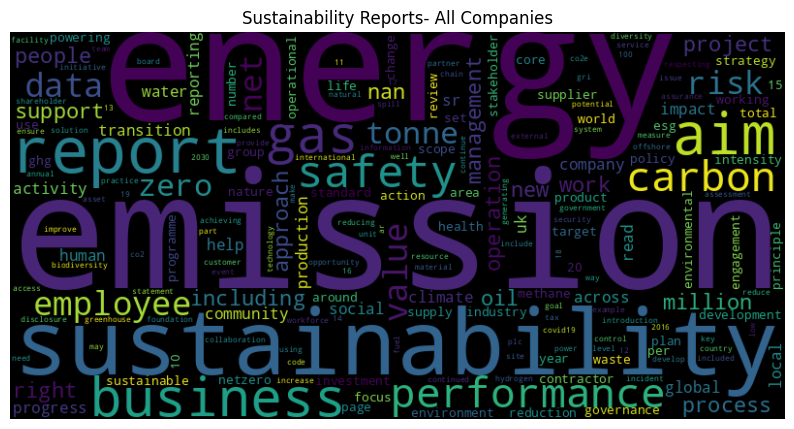

In [19]:
# Plotting word frequency plot
dataplot = dict(zip(counts_sust_df[0].tolist(), counts_sust_df[1].tolist()))
# Generate a word cloud image
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataplot)
# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Sustainability Reports- All Companies')
plt.show()

In [20]:
# Identifying top 25 relevant words and looking at their trends over the years
list_of_words = ['emission', 'energy', 'sustainability|sustainable', 'gas', 'safety', 'carbon', 'net zero|netzero', 'oil', 'transition', 'social', 'impact', 'human', 'climate', 'water', 'production', 'esg', 'reduce|reduction', 'environment', 'nature', 'waste', 'pollution|polluting|polluted', 'methane', 'ghg', 'world', 'biodiversity']
len(list_of_words)

25

In [21]:
import re
def count_words(text, word):
    alternatives = word.split('|')
    count = 0
    for alt in alternatives:
      counts = text.lower().count(alt.lower())
      count+=counts
    return count

for words in list_of_words:
  df_sustainability_text[words] = df_sustainability_text['text_cleaned'].apply(lambda x: count_words(x, words))

In [22]:
def get_year(text):
  text = str(text)
  if '2022' in text:
    return 2022
  elif '2021' in text:
    return 2021
  elif '2020' in text:
    return 2020
  else:
    return 2022
df_sustainability_text['year'] = df_sustainability_text['source_type'].apply(lambda x: get_year(x))
df_sustainability_text.head()

,company,source_type,source_link,source_text,text_cleaned,emission,energy,sustainability|sustainable,gas,safety,...,reduce|reduction,environment,nature,waste,pollution|polluting|polluted,methane,ghg,world,biodiversity,year
0,Shell,Website,https://reports.shell.com/sustainability-repor...,Shell Sustainability Report 2022 - Shell pl...,sustainability report plc sustainability repor...,31,28,43,14,27,...,6,10,16,11,0,4,1,2,5,2022
1,Shell,Website,https://www.shell.com/sustainability/our-appro...,What does Sustaina...,sustainability mean sustainable development gl...,6,11,21,0,1,...,1,8,1,1,0,0,0,3,1,2022
2,Shell,Website,https://www.shell.com/sustainability/our-appro...,UN Sustainable Dev...,un sustainable development goal global,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2022
3,Shell,Website,https://www.shell.com/sustainability/our-appro...,Sustainability Gov...,sustainability governance global skip main con...,1,4,24,0,7,...,0,7,0,0,0,0,0,1,1,2022
4,Shell,Website,https://www.shell.com/sustainability/our-appro...,"Commitments, polic...",commitment policy standard global,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022


In [23]:
df_sustainability_text.tail()

,company,source_type,source_link,source_text,text_cleaned,emission,energy,sustainability|sustainable,gas,safety,...,reduce|reduction,environment,nature,waste,pollution|polluting|polluted,methane,ghg,world,biodiversity,year
270,BP,Annual Report 2021,https://www.bp.com/content/dam/bp/business-sit...,Performing while transforming bp Annual Report...,performing transforming annual report form 20f...,271,818,240,866,180,...,232,218,60,17,12,44,48,103,13,2021
271,BP,Annual Report 2022,https://www.bp.com/content/dam/bp/business-sit...,Performing while transforming bp Annual Report...,performing transforming annual report form 20f...,149,427,191,291,195,...,155,99,32,6,0,30,25,62,9,2022
272,Harbour Energy,Annual Report 2020,https://www.harbourenergy.com/media/mpahhmcr/c...,Annual Report and Accounts 31 DECEMBER 2020 na...,annual report account 31 december nan register...,77,130,106,341,89,...,147,129,35,13,1,1,45,27,4,2020
273,Harbour Energy,Annual Report 2021,https://www.harbourenergy.com/media/qx5bquys/h...,Harbour Energy plc Annual Report & Accounts 20...,energy plc annual report account nan global in...,105,370,19,318,110,...,81,109,19,3,0,1,21,19,0,2021
274,Harbour Energy,Annual Report 2022,https://www.harbourenergy.com/media/w4lcauvd/h...,Annual Report & Accounts 2022 Harbour Energy p...,annual report account energy plc nan energy ai...,171,548,33,410,142,...,144,126,18,10,1,6,61,44,0,2022


In [24]:
# Replacing Harbour Energy's 2020 Annual Report value with its mean (Divide by 2)
df_sustainability_text

,company,source_type,source_link,source_text,text_cleaned,emission,energy,sustainability|sustainable,gas,safety,...,reduce|reduction,environment,nature,waste,pollution|polluting|polluted,methane,ghg,world,biodiversity,year
0,Shell,Website,https://reports.shell.com/sustainability-repor...,Shell Sustainability Report 2022 - Shell pl...,sustainability report plc sustainability repor...,31,28,43,14,27,...,6,10,16,11,0,4,1,2,5,2022
1,Shell,Website,https://www.shell.com/sustainability/our-appro...,What does Sustaina...,sustainability mean sustainable development gl...,6,11,21,0,1,...,1,8,1,1,0,0,0,3,1,2022
2,Shell,Website,https://www.shell.com/sustainability/our-appro...,UN Sustainable Dev...,un sustainable development goal global,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2022
3,Shell,Website,https://www.shell.com/sustainability/our-appro...,Sustainability Gov...,sustainability governance global skip main con...,1,4,24,0,7,...,0,7,0,0,0,0,0,1,1,2022
4,Shell,Website,https://www.shell.com/sustainability/our-appro...,"Commitments, polic...",commitment policy standard global,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,BP,Annual Report 2021,https://www.bp.com/content/dam/bp/business-sit...,Performing while transforming bp Annual Report...,performing transforming annual report form 20f...,271,818,240,866,180,...,232,218,60,17,12,44,48,103,13,2021
271,BP,Annual Report 2022,https://www.bp.com/content/dam/bp/business-sit...,Performing while transforming bp Annual Report...,performing transforming annual report form 20f...,149,427,191,291,195,...,155,99,32,6,0,30,25,62,9,2022
272,Harbour Energy,Annual Report 2020,https://www.harbourenergy.com/media/mpahhmcr/c...,Annual Report and Accounts 31 DECEMBER 2020 na...,annual report account 31 december nan register...,77,130,106,341,89,...,147,129,35,13,1,1,45,27,4,2020
273,Harbour Energy,Annual Report 2021,https://www.harbourenergy.com/media/qx5bquys/h...,Harbour Energy plc Annual Report & Accounts 20...,energy plc annual report account nan global in...,105,370,19,318,110,...,81,109,19,3,0,1,21,19,0,2021


### Bubble Plot - Keywords used in Company Websites

In [25]:
website_df = df_sustainability_text[df_sustainability_text['source_type']=='Website']
website_df1 = website_df.groupby(['company']).sum()
website_df1.reset_index(inplace=True)
website_df1 = website_df1.drop(columns=['year'])
website_df1

<ipython-input-25-0b9017f0c8ce>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  website_df1 = website_df.groupby(['company']).sum()


,company,emission,energy,sustainability|sustainable,gas,safety,carbon,net zero|netzero,oil,transition,...,esg,reduce|reduction,environment,nature,waste,pollution|polluting|polluted,methane,ghg,world,biodiversity
0,BP,44,517,432,104,165,138,186,71,109,...,70,55,48,24,12,0,14,4,237,48
1,Harbour Energy,73,1152,34,444,1533,99,70,440,187,...,968,70,255,3,8,4,0,4,321,2
2,Shell,83,166,220,41,111,73,83,16,87,...,8,23,75,49,29,2,11,3,26,19


In [26]:
# Normalising the word counts by finding each word's usage as a percent of total words used
overall_counts = []
for co in ['BP', 'Harbour Energy', 'Shell']:
  wds = ' '.join(df_sustainability_text[(df_sustainability_text['company']==co)&(df_sustainability_text['source_type']=='Website')]['text_cleaned'])
  overall_counts.append(len(wds.split(' ')))
print(overall_counts)
# Getting the % values
website_df_percent = website_df1.copy()
website_df_percent = website_df_percent.drop(columns=['company'])
for i in range(3):
  website_df_percent.iloc[i] = website_df_percent.iloc[i].div(overall_counts[i]/50000)
website_df_percent.columns = [f'{co}%' for co in website_df_percent.columns]
website_df1 = pd.concat([website_df1, website_df_percent], axis=1)
website_df1['company'].iloc[1] = 'Harbour'
website_df1

[36643, 57987, 10462]


<ipython-input-26-86d307dd74a3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website_df1['company'].iloc[1] = 'Harbour'


,company,emission,energy,sustainability|sustainable,gas,safety,carbon,net zero|netzero,oil,transition,...,esg%,reduce|reduction%,environment%,nature%,waste%,pollution|polluting|polluted%,methane%,ghg%,world%,biodiversity%
0,BP,44,517,432,104,165,138,186,71,109,...,95.516197,75.048440,65.496821,32.748410,16.374205,0.000000,19.103239,5.458068,323.390552,65.496821
1,Harbour,73,1152,34,444,1533,99,70,440,187,...,834.669840,60.358356,219.876869,2.586787,6.898098,3.449049,0.000000,3.449049,276.786176,1.724524
2,Shell,83,166,220,41,111,73,83,16,87,...,38.233607,109.921621,358.440069,234.180845,138.596827,9.558402,52.571210,14.337603,124.259224,90.804817


In [27]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=5, cols=5, subplot_titles=list_of_words)

# Populate subplots with bubble plots for each word
for i, word in enumerate(list_of_words):
    row = i // 5 + 1
    col = i % 5 + 1
    fig.add_trace(
        go.Scatter(
            x=website_df1['company'],
            y=website_df1[word],
            mode='markers',
            marker=dict(size=website_df1[f'{word}%'], sizemode='area'),
            name=word,
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title_text="Word Counts by Company",
    showlegend=False,
)

fig.update_layout(
    height=1000,  # Set the total height of the figure
    width=1200,  # Set the total width of the figure
)

# Show the figure
fig.show()


### Visualising Annual Report and Sustainability Report Word Counts over 2020-2022

In [28]:
report_data = df_sustainability_text[df_sustainability_text['source_type']!='Website']
# Create an empty DataFrame to store summed values
summed_df1 = report_data.groupby(['year', 'company']).sum()
summed_df1.reset_index(inplace=True)
# summed_df = summed_df.drop(columns = ['source_link', 'source_text', 'text_cleaned'])
summed_df1.head()

<ipython-input-28-b096d86463e5>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,year,company,emission,energy,sustainability|sustainable,gas,safety,carbon,net zero|netzero,oil,...,esg,reduce|reduction,environment,nature,waste,pollution|polluting|polluted,methane,ghg,world,biodiversity
0,2020,BP,287,568,752,325,221,462,246,236,...,22,242,180,71,31,3,92,613,186,96
1,2020,Harbour Energy,150,181,220,398,142,141,59,699,...,23,170,196,40,38,7,2,85,37,7
2,2020,Shell,823,1043,513,1199,473,617,246,1073,...,12,368,515,222,160,9,117,232,184,75
3,2021,BP,420,986,519,943,244,710,229,1016,...,32,330,261,89,39,15,137,72,150,70
4,2021,Harbour Energy,198,523,62,378,254,109,105,441,...,116,122,204,26,22,2,5,43,40,6


In [29]:
# Normalising the word counts by finding each word's usage as a percent of total words used
overall_counts_reports = []
for yr in [2020, 2021, 2022]:
  for co in ['BP', 'Harbour Energy', 'Shell']:
    wds = ' '.join(df_sustainability_text[(df_sustainability_text['company']==co)&(df_sustainability_text['source_type']!='Website')&(df_sustainability_text['year']==yr)]['text_cleaned'])
    overall_counts_reports.append(len(wds.split(' ')))
print(overall_counts_reports)
# Getting the % values
summed_df_percent = summed_df1.copy()
summed_df_percent = summed_df_percent.drop(columns=['company', 'year'])
summed_df_percent
for i in range(9):
  summed_df_percent.iloc[i] = summed_df_percent.iloc[i].div(overall_counts_reports[i]/100000)
summed_df_percent.columns = [f'{co}%' for co in summed_df_percent.columns]
summed_df1 = pd.concat([summed_df1, summed_df_percent], axis=1)
summed_df1['company'].iloc[1] = 'Harbour'
summed_df1['company'].iloc[4] = 'Harbour'
summed_df1['company'].iloc[7] = 'Harbour'
summed_df1

[244065, 89954, 186716, 205252, 74097, 180235, 269553, 95777, 181808]


<ipython-input-29-85f082eb43fa>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-85f082eb43fa>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-85f082eb43fa>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,company,emission,energy,sustainability|sustainable,gas,safety,carbon,net zero|netzero,oil,...,esg%,reduce|reduction%,environment%,nature%,waste%,pollution|polluting|polluted%,methane%,ghg%,world%,biodiversity%
0,2020,BP,287,568,752,325,221,462,246,236,...,9.013992,99.153914,73.750845,29.090611,12.701534,1.229181,37.694876,251.162600,76.209207,39.333784
1,2020,Harbour,150,181,220,398,142,141,59,699,...,25.568624,188.985481,217.889143,44.467172,42.243814,7.781755,2.223359,94.492741,41.132134,7.781755
2,2020,Shell,823,1043,513,1199,473,617,246,1073,...,6.426873,197.090769,275.819962,118.897149,85.691639,4.820155,62.662011,124.252876,98.545384,40.167956
3,2021,BP,420,986,519,943,244,710,229,1016,...,15.590591,160.777970,127.160758,43.361331,19.001033,7.308090,66.747218,35.078830,73.080896,34.104418
4,2021,Harbour,198,523,62,378,254,109,105,441,...,156.551547,164.649041,275.314790,35.089140,29.690811,2.699165,6.747912,58.032039,53.983292,8.097494
5,2021,Shell,921,1210,461,1035,339,629,271,889,...,9.986961,172.552501,231.364607,115.959719,51.044470,3.328987,29.406053,105.417927,79.895692,37.173690
6,2022,BP,325,680,464,402,261,539,200,287,...,10.016583,105.359614,50.824884,23.743012,11.871506,0.370985,43.034208,18.920212,46.002085,27.823842
7,2022,Harbour,385,885,59,518,420,192,154,484,...,337.241718,242.229345,376.917214,28.190484,82.483268,4.176368,17.749564,123.202857,65.777796,13.573196
8,2022,Shell,662,1244,269,945,313,691,55,777,...,6.050339,172.159641,173.259703,75.354220,27.501540,8.250462,17.050955,75.354220,70.403943,20.351140


In [30]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a color map for companies
color_map = {'BP': '#009B00', 'Harbour': '#003a70', 'Shell': '#FFD500'}

# Create subplots
fig = make_subplots(rows=len(list_of_words)//5 + 1, cols=5, subplot_titles=list_of_words)

# Add traces to subplots
for i, word in enumerate(list_of_words):
    row = i // 5 + 1
    col = i % 5 + 1
    subplot_df = summed_df1[['year', 'company', word]].groupby(['year', 'company']).sum().reset_index()
    for company in summed_df1['company'].unique():
        company_data = subplot_df[subplot_df['company'] == company]
        fig.add_trace(go.Scatter(x=company_data['year'], y=company_data[word], mode='lines+markers', name=company, line=dict(color=color_map[company])), row=row, col=col)

# Update layout
fig.update_layout(height=1500, title_text="Word Count Over Three Years by Company", showlegend=False)

# Update x-axis and y-axis labels
fig.update_xaxes(title_text="Year", showgrid=True, tickvals=[2020, 2021, 2022], tickmode='array')
fig.update_yaxes(title_text="Word Count", showgrid=True)

# Show the figure
fig.show()